# Разбиение по платформам

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

ad_revenue_data = pd.read_excel('Ad_revenue.xlsx', sheet_name='ad revenue')
installs_data = pd.read_excel('Ad_revenue.xlsx', sheet_name='installs data')

# Создаем новую колонку, где указываем, сколько дней прошло с момента установки игры.
ad_revenue_data['days_since_install'] = (ad_revenue_data['event_date'] - ad_revenue_data['install_date']).dt.days
# Разбиваем данные по платформам (Android, iOS).
platforms = ad_revenue_data['platform'].unique()

FileNotFoundError: [Errno 2] No such file or directory: 'Ad_revenue.xlsx'

/home/vladislav/Рабочий стол/work/new_venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


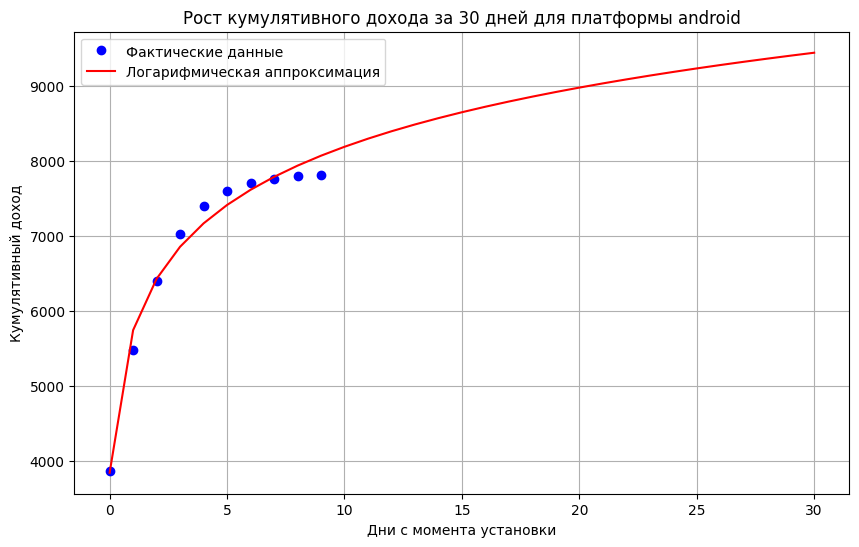

/home/vladislav/Рабочий стол/work/new_venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


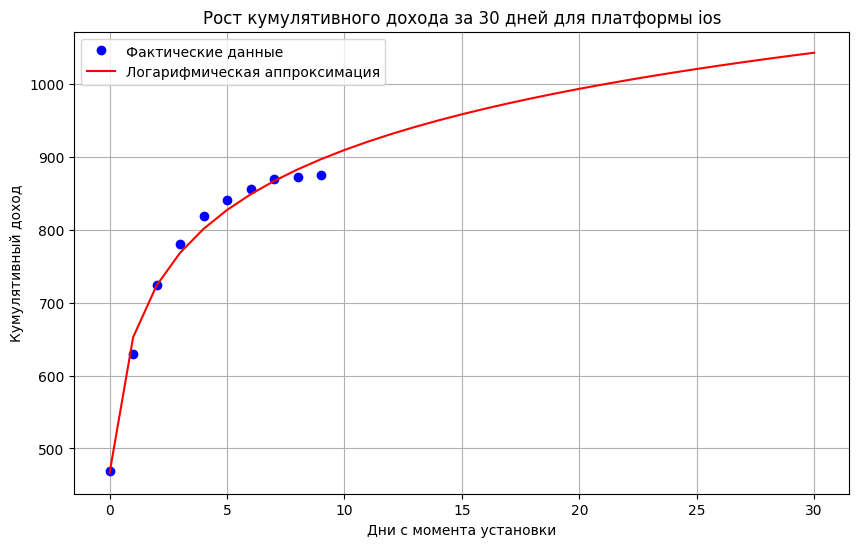

Платформа: android
Кумулятивный доход (0 день): 3842.02
Кумулятивный доход на 1-й день: 5741.88
Кумулятивный доход на 3-й день: 6853.49
Кумулятивный доход на 30-й день: 9438.89
Рост дохода с 0 до 30 дня: 2.46
Рост дохода с 1 до 30 дня: 1.64
Рост дохода с 3 до 30 дня: 1.38
Платформа: ios
Кумулятивный доход (0 день): 466.75
Кумулятивный доход на 1-й день: 652.66
Кумулятивный доход на 3-й день: 768.65
Кумулятивный доход на 30-й день: 1043.26
Рост дохода с 0 до 30 дня: 2.24
Рост дохода с 1 до 30 дня: 1.6
Рост дохода с 3 до 30 дня: 1.36


In [ ]:
# Функция для аппроксимации кумулятивного роста (логарифмическая)
def log_growth(x, a, b, c):
    return a * np.log(b * x + c)

# Для каждой платформы строим графики, которые показывают, как меняется доход с течением времени.
results = {}
for platform in platforms:
    # Фильтрация данных по платформе
    platform_data = ad_revenue_data[ad_revenue_data['platform'] == platform]
    # Суммарный доход по дням с момента установки
    revenue_by_days = platform_data.groupby('days_since_install')['event_revenue'].sum().reset_index()
    # Кумулятивный доход
    revenue_by_days['cumulative_revenue'] = revenue_by_days['event_revenue'].cumsum()
    # Подгонка модели
    x_data = revenue_by_days['days_since_install']
    y_data = revenue_by_days['cumulative_revenue']
    params, covariance = curve_fit(log_growth, x_data, y_data, p0=[1, 1, 1], maxfev=10000)
    # Прогноз на 30 дней
    days = np.arange(0, 31)
    predicted_cumulative_revenue = log_growth(days, *params)
    # Визуализация
    plt.figure(figsize=(10, 6))
    plt.plot(x_data, y_data, 'bo', label='Фактические данные')
    plt.plot(days, predicted_cumulative_revenue, 'r-', label='Логарифмическая аппроксимация')
    plt.xlabel('Дни с момента установки')
    plt.ylabel('Кумулятивный доход')
    plt.title(f'Рост кумулятивного дохода за 30 дней для платформы {platform}')
    plt.legend()
    plt.grid(True)
    plt.show()
    # Рассчитываем кратный рост дохода по дням
    initial_revenue = predicted_cumulative_revenue[0] if predicted_cumulative_revenue[0] != 0 else 1 # 0 День
    first_day_revenue = predicted_cumulative_revenue[1] # 1 День
    third_day_revenue = predicted_cumulative_revenue[3] # 3 День
    thirtieth_day_revenue = predicted_cumulative_revenue[30] # 30 День
    growth_initial_to_30 = thirtieth_day_revenue / initial_revenue # Во сколько раз увеличится ревеню нулевого дня
    growth_first_to_30 = thirtieth_day_revenue / first_day_revenue # Во сколько раз увеличится ревеню первого дня  дня
    growth_third_to_30 = thirtieth_day_revenue / third_day_revenue # Во сколько раз увеличится ревеню третьего дня  дня
    results[platform] = {
        'initial_revenue': initial_revenue,
        'first_day_revenue': first_day_revenue,
        'third_day_revenue': third_day_revenue,
        'thirtieth_day_revenue': thirtieth_day_revenue,
        'growth_initial_to_30': growth_initial_to_30,
        'growth_first_to_30': growth_first_to_30,
        'growth_third_to_30': growth_third_to_30
    }
for platform, metrics in results.items():
    print(f"Платформа: {platform}")
    print(f"Кумулятивный доход (0 день): {round(metrics['initial_revenue'], 2)}")
    print(f"Кумулятивный доход на 1-й день: {round(metrics['first_day_revenue'], 2)}")
    print(f"Кумулятивный доход на 3-й день: {round(metrics['third_day_revenue'], 2)}")
    print(f"Кумулятивный доход на 30-й день: {round(metrics['thirtieth_day_revenue'], 2)}")
    print(f"Рост дохода с 0 до 30 дня: {round(metrics['growth_initial_to_30'], 2)}")
    print(f"Рост дохода с 1 до 30 дня: {round(metrics['growth_first_to_30'], 2)}")
    print(f"Рост дохода с 3 до 30 дня: {round(metrics['growth_third_to_30'], 2)}")

# Заключение

На основании анализа данных по доходам пользователей, установивших игру в период с 21.09.23 по 28.09.23, были сделаны выводы о ревеню в первый месяц жизни у пользователей игры.

## Платформа: Android
- **Кумулятивный доход на 0 день**: 3842.02
- **Кумулятивный доход на 1-й день**: 5741.88
- **Кумулятивный доход на 3-й день**: 6853.49
- **Кумулятивный доход на 30-й день**: 9438.89

### Рост дохода:
- **С 0 до 30 дня**: доход увеличился в 2.46 раза.
- **С 1 до 30 дня**: доход увеличился в 1.64 раза.
- **С 3 до 30 дня**: доход увеличился в 1.38 раза.

## Платформа: iOS
- **Кумулятивный доход на 0 день**: 466.75
- **Кумулятивный доход на 1-й день**: 652.66
- **Кумулятивный доход на 3-й день**: 768.65
- **Кумулятивный доход на 30-й день**: 1043.26

### Рост дохода:
- **С 0 до 30 дня**: доход увеличился в 2.24 раза.
- **С 1 до 30 дня**: доход увеличился в 1.6 раза.
- **С 3 до 30 дня**: доход увеличился в 1.36 раза.

## Выводы:
1. **Рост дохода по платформам**:
   - На платформе Android наблюдается более значительный рост дохода с 0 до 30 дня (2.46 раза) по сравнению с iOS (2.24 раза).
   - В то же время, рост дохода с 1 до 30 дня и с 3 до 30 дня также выше на платформе Android, что может свидетельствовать о более активной монетизации на этой платформе в течение первого месяца.

2. **Общая тенденция**:
   - И на Android, и на iOS наиболее значительный рост дохода наблюдается с 0 до 30 дня, после чего темпы роста начинают снижаться. Это может указывать на то, что пользователи наиболее активно взаимодействуют с игрой в первые дни после установки, что подчеркивает важность первоначального периода для стратегии монетизации.

3. **Рекомендации**:
   - Для дальнейшего увеличения дохода можно рассмотреть введение дополнительных акций и предложений в первые 30 дней после установки игры, особенно на Android, где пользователи показывают более высокий потенциал для роста дохода.
   - На платформе iOS также стоит обратить внимание на стратегии удержания пользователей и вовлечения их в процесс монетизации на ранних стадиях.

# Без разбиения по платформам

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

ad_revenue_data = pd.read_excel('Ad_revenue.xlsx', sheet_name='ad revenue')
installs_data = pd.read_excel('Ad_revenue.xlsx', sheet_name='installs data')
# Создаем новую колонку, где указываем, сколько дней прошло с момента установки игры.
ad_revenue_data['days_since_install'] = (ad_revenue_data['event_date'] - ad_revenue_data['install_date']).dt.days
# Суммарный доход по дням с момента установки
revenue_by_days = ad_revenue_data.groupby('days_since_install')['event_revenue'].sum().reset_index()
# Кумулятивный доход
revenue_by_days['cumulative_revenue'] = revenue_by_days['event_revenue'].cumsum()

/home/vladislav/Рабочий стол/work/new_venv/lib/python3.9/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


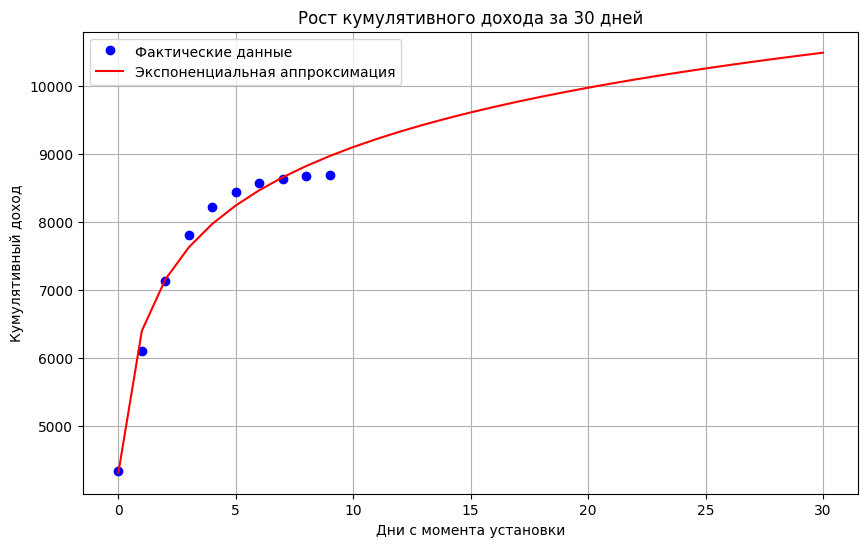

Доход (0 день): 4308.72
Кумулятивный доход на 1-й день: 6394.56
Кумулятивный доход на 3-й день: 7622.21
Кумулятивный доход на 30-й день: 10481.85
Рост дохода с 0 до 30 дня: 2.43
Рост дохода с 1 до 30 дня: 1.64
Рост дохода с 3 до 30 дня: 1.38


In [ ]:
# Функция для аппроксимации кумулятивного роста (логарифмическая)
def exp_growth(x, a, b, c):
    return a * np.log(b * x + c)

# Подгонка модели
x_data = revenue_by_days['days_since_install']
y_data = revenue_by_days['cumulative_revenue']
params, covariance = curve_fit(exp_growth, x_data, y_data, p0=[1, 0.1, 1], maxfev=10000)

# Прогноз на 30 дней
days = np.arange(0, 31)
predicted_cumulative_revenue = exp_growth(days, *params)

# Строим графики, который показывает, как меняется доход с течением времени.
# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'bo', label='Фактические данные')
plt.plot(days, predicted_cumulative_revenue, 'r-', label='Экспоненциальная аппроксимация')
plt.xlabel('Дни с момента установки')
plt.ylabel('Кумулятивный доход')
plt.title(f'Рост кумулятивного дохода за 30 дней')
plt.legend()
plt.grid(True)
plt.show()

# Рассчитываем кратный рост дохода по дням
initial_revenue = predicted_cumulative_revenue[0] if predicted_cumulative_revenue[0] != 0 else 1  # 0 День
first_day_revenue = predicted_cumulative_revenue[1] # 1 День
third_day_revenue = predicted_cumulative_revenue[3] # 3 День
thirtieth_day_revenue = predicted_cumulative_revenue[30] # День

growth_initial_to_30 = thirtieth_day_revenue / initial_revenue # Во сколько раз увеличится ревеню нулевого дня
growth_first_to_30 = thirtieth_day_revenue / first_day_revenue # Во сколько раз увеличится ревеню первого дня  дня
growth_third_to_30 = thirtieth_day_revenue / third_day_revenue # Во сколько раз увеличится ревеню третьего дня  дня

results = {
    'initial_revenue': initial_revenue,
    'first_day_revenue': first_day_revenue,
    'third_day_revenue': third_day_revenue,
    'thirtieth_day_revenue': thirtieth_day_revenue,
    'growth_initial_to_30': growth_initial_to_30,
    'growth_first_to_30': growth_first_to_30,
    'growth_third_to_30': growth_third_to_30
}

print("Доход (0 день):", round(results['initial_revenue'], 2))
print("Кумулятивный доход на 1-й день:", round(results['first_day_revenue'], 2))
print("Кумулятивный доход на 3-й день:", round(results['third_day_revenue'], 2))
print("Кумулятивный доход на 30-й день:", round(results['thirtieth_day_revenue'], 2))
print("Рост дохода с 0 до 30 дня:", round(results['growth_initial_to_30'], 2))
print("Рост дохода с 1 до 30 дня:", round(results['growth_first_to_30'], 2))
print("Рост дохода с 3 до 30 дня:", round(results['growth_third_to_30'], 2))

# Анализ когорт для A/B тестирования

### Данные

- **Cohort Size (Размер когорты)**:
  - A: 500
  - B: 500

- **Paying Share (Процент платящих пользователей)**:
  - A: 10%
  - B: 14%

- **ARPU (Средний доход на пользователя)**:
  - A: 1%
  - B: 0.8%

- **Retention D30 (Удержание на 30-й день)**:
  - A: 5%
  - B: 4%

### Шаги анализа

1. **Размеры когорт**: Размеры когорт одинаковы и составляют 500 пользователей в каждой группе.

2. **Процент платящих пользователей**:
   - Когорта A: 10% из 500 = 50 платящих пользователей.
   - Когорта B: 14% из 500 = 70 платящих пользователей.

3. **Средний доход на пользователя (ARPU)**:
   - ARPU (Average Revenue Per User) обычно выражается в валюте, но здесь почему-то проценты. Предположим, что это отношение дохода к некоторому базовому значению.
   - Когорта A: 1% от общего дохода.
   - Когорта B: 0.8% от общего дохода.

4. **Удержание на 30-й день**:
   - Когорта A: 5% из 500 = 25 пользователей продолжают пользоваться на 30-й день.
   - Когорта B: 4% из 500 = 20 пользователей продолжают пользоваться на 30-й день.

### Рассчитываем ключевые метрики

1. **Общее количество платящих пользователей**:
   - Когорта A: 50 пользователей.
   - Когорта B: 70 пользователей.

2. **Общий доход** (!предполагая!, что процент ARPU применяется к базовому доходу от платящих пользователей):
   - Когорта A: 50 пользователей * 1% = 0.5 единицы дохода.
   - Когорта B: 70 пользователей * 0.8% = 0.56 единицы дохода.

3. **Удержание на 30-й день**:
   - Когорта A: 25 пользователей.
   - Когорта B: 20 пользователей.

### Сравнение когорт

- **Платящие пользователи**: В группе B больше платящих пользователей (14% против 10%).
- **Доход**: Группа B генерирует немного больше дохода из-за большего количества платящих пользователей, несмотря на более низкий ARPU.
- **Удержание**: Группа A показывает лучшее удержание на 30-й день.

### Заключение

- **Группа B** демонстрирует лучшие результаты по количеству платящих пользователей и общему доходу, несмотря на более низкий ARPU.
- **Группа A** имеет лучшее удержание на 30-й день, что может указывать на более долгосрочную вовлеченность пользователей.

### Решение

В контексте игры, удержание пользователей может быть особенно важным, так как это может означать, что игроки находят игру интересной и продолжают в нее играть. Это может привести к увеличению дохода в долгосрочной перспективе через внутриигровые покупки и привлечение новых игроков.